In [1]:
import random
import numpy
from scipy.stats import t,norm
import matplotlib.pyplot as plt
import numpy as np

### Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?

<b>Step-1:- Determining the hypothesis</b><br>
Null Hypothesis(H<sub>0</sub>) - Each parcel contains 500gm of food.<br>
Alternate Hypothesis(H<sub>1</sub>) - Each parcel dosent contains 500gm of food.

<b>Step-2:- Sample Collection</b><br>
Collect sample of size n=10 eg:-[490, 220, 470, 500, 495, 496, 496, 498, 508, 480]<br>
Calculate mean of the sample:- 465.4

<b>Step-3:-Compute test statistic</b>

$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

<b>Step-4:-Decide significance level</b>
<br>

<b>Step-5:-Apply decision rule</b><br>
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

<b>Step-6:- Compute p-value $ P(Test \ Statistics | H_0) $</b><br>
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [2]:
sample = []
n = 10
for i in range(n):
    sample.append(random.randint(250,550))
sample = numpy.array(sample)
print(sample)

[288 313 383 517 299 467 460 524 462 440]


In [3]:
print(sample.mean())

415.3


In [4]:
confidence = 0.95
alpha = 1-confidence
t_critical = t.ppf(1 - alpha/2,df=19)
print(t_critical)

2.093024054408263


In [5]:
sample_size = 10
sample_mean = sample.mean()
pop_mean = 500
pop_std = sample.std()

In [6]:
def t_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = pop_std / sample_size**0.5
    return numerator / denomenator

t = t_score(sample_size, sample_mean, pop_mean, pop_std)

print(t)

-3.181870717681658


Text(415.3, 0.0007, 'x_bar')

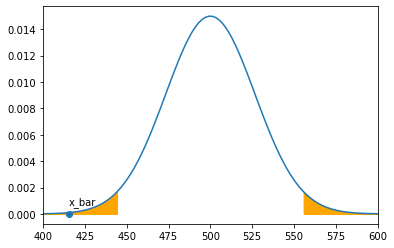

In [7]:
x_min = 400
x_max = 600


mean = pop_mean
std = pop_std / sample_size**0.5


x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

In [8]:
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [9]:
p_value = 2 * (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.0014632712036968254
Reject Null Hypothesis


#### Null hypothesis i.e "Each parcel contains 500gm of food" is rejected. So alternate hypothesis i.e "Each parcel dosen't contain 500gm of food" is accepted. So it is concluded that on average each packet does not contain 500 grams of biryani.

<hr style="height:1px">